In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

# Ideas on simple features

* Create simple derived features : departement (from postal_code)
* Target encoding for categorical variables (ie `property_type`, `city`, `exposition`, etc.)
* Find a smart way to encode the `nb_...` features
* External data encoding for cities: population, average salary, etc. (may be slightly complicated)
* Ratio features on the `nb_...` features, and with size
* 

# Loading

In [85]:
df_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

data_all = pd.merge(df_train, y_train, on="id_annonce")
data_all["log_price"] = np.log(data_all["price"])

In [86]:
# reducing the extreme values allows to reduce the number of
# categories of those variables

# energy_performance_value and ghg_value seem to have crazy values
# they are probably equivalent to nan
max_energy_perf_val = 1_000
max_ghg_val = 150
data_all["energy_performance_value"] = data_all["energy_performance_value"].clip(
    None, max_energy_perf_val
)
data_all["ghg_value"] = data_all["ghg_value"].clip(None, max_ghg_val)

# same for rooms
max_rooms = 20
max_bedrooms = 10
data_all["nb_rooms"] = data_all["nb_rooms"].clip(None, max_rooms)
data_all["nb_bedrooms"] = data_all["nb_rooms"].clip(None, max_bedrooms)

# same for size
max_size = 2_000
max_landsize = 20_000
data_all["size"] = data_all["size"].clip(None, max_size)
data_all["land_size"] = data_all["land_size"].clip(None, max_landsize)

In [110]:
data_all.head()

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,ghg_value,ghg_category,exposition,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,price,log_price
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,355000.0,12.779873
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,52.0,E,NaN,5.0,5.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0,12.154779
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,NaN,NaN,NaN,Sud,2.0,2.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39000.0,10.571317
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,D,44.0,E,NaN,4.0,4.0,NaN,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,299000.0,12.608199
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,478000.0,13.077366


In [152]:
data_all.query("property_type == 'appartement'")["size"].describe(percentiles=[.8])

count    15631.000000
mean       439.888555
std        727.161907
min          3.000000
50%         77.000000
80%        668.000000
max       2000.000000
Name: size, dtype: float64

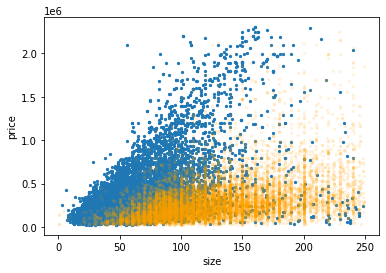

In [153]:
ax = data_all.query("property_type == 'appartement' and size < 250").plot(x='size', y='price', kind="scatter", marker=".")
data_all.query("property_type == 'maison' and size < 250").plot(x='size', y='price', kind="scatter", marker=".", c="orange", alpha=.1, ax=ax)
plt.show()

In [87]:
df_train.head()

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,ghg_value,ghg_category,exposition,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,52.0,E,NaN,5.0,4.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,NaN,NaN,NaN,Sud,2.0,1.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,D,44.0,E,NaN,4.0,3.0,NaN,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
y_train.head()

,id_annonce,price
0,35996577,355000.0
1,35811033,190000.0
2,35731841,39000.0
3,35886765,299000.0
4,35781137,478000.0


# Target visualisation

<AxesSubplot:title={'center':'Mean target = 343221€a'}, ylabel='Frequency'>

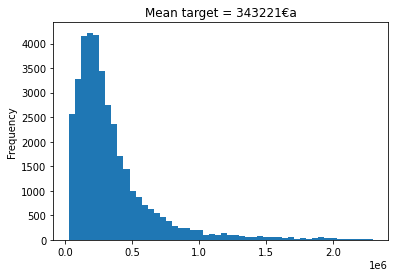

In [89]:
# skewed target
data_all["price"].plot(
    kind="hist", bins=50, title=f"Mean target = {data_all['price'].mean():.0f}€a"
)

<AxesSubplot:title={'center':'Mean target = 12€a'}, ylabel='Frequency'>

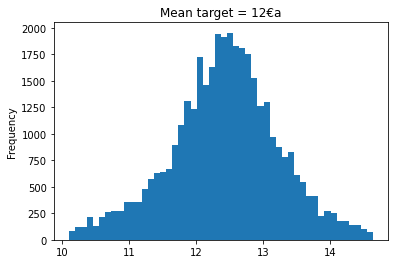

In [90]:
# skewed target
data_all["log_price"].plot(
    kind="hist", bins=50, title=f"Mean target = {data_all['log_price'].mean():.0f}€a"
)

# Basic correlation between target and features

In [91]:
# linear relation towards target
data_all.corr()["price"].round(2).sort_values(ascending=False, key=abs).to_frame().T

,price,log_price,nb_rooms,nb_bedrooms,nb_bathrooms,nb_photos,energy_performance_value,land_size,has_a_cellar,nb_terraces,postal_code,approximate_longitude,floor,has_a_balcony,nb_parking_places,has_air_conditioning,last_floor,has_a_garage,nb_boxes,approximate_latitude,ghg_value,upper_floors,size,id_annonce
price,1.0,0.86,0.34,0.33,0.22,0.21,-0.19,0.17,0.14,0.13,0.12,0.1,0.09,0.06,0.06,0.06,0.05,0.04,0.03,0.03,-0.02,-0.01,0.01,-0.01


In [92]:
# linear relation towards target
data_all.corr()["log_price"].round(2).sort_values(ascending=False, key=abs).to_frame().T

,log_price,price,nb_bathrooms,nb_bedrooms,nb_rooms,energy_performance_value,nb_photos,nb_terraces,land_size,postal_code,has_a_cellar,nb_parking_places,has_a_balcony,approximate_longitude,floor,nb_boxes,ghg_value,has_air_conditioning,has_a_garage,last_floor,size,approximate_latitude,id_annonce,upper_floors
log_price,1.0,0.86,0.42,0.41,0.39,-0.28,0.23,0.21,0.17,0.15,0.13,0.13,0.1,0.1,0.1,0.08,-0.08,0.07,0.06,0.05,-0.03,0.03,0.03,-0.0


In [94]:
for c in data_all.columns:
    unique_values = data_all[c].unique()
    if len(unique_values) < 50:
        print(f"{c} is categorical, its values are {unique_values}")
    elif data_all[c].dtype == float:
        print(
            f"{c} is continuous, its description is {data_all[c].describe().round(2)}"
        )
    else:
        print(f"{c} is categorical, some values are {unique_values[:10]}")

    print("-" * 50)

id_annonce is categorical, some values are [35996577 35811033 35731841 35886765 35781137 36048491 36049101 35886249
 36058309 35783101]
--------------------------------------------------
property_type is categorical, its values are ['appartement' 'maison' 'propriété' 'divers' 'duplex' 'terrain' 'villa'
 'viager' 'terrain à bâtir' 'ferme' 'parking' 'moulin' 'loft' 'manoir'
 'chalet' 'péniche' 'atelier' 'château' 'chambre' 'gîte'
 'hôtel particulier' 'hôtel']
--------------------------------------------------
approximate_latitude is continuous, its description is count    37368.00
mean        46.55
std          2.36
min         41.37
25%         43.92
50%         46.94
75%         48.84
max         51.08
Name: approximate_latitude, dtype: float64
--------------------------------------------------
approximate_longitude is continuous, its description is count    37368.00
mean         2.62
std          2.60
min         -4.73
25%          1.10
50%          2.38
75%          4.62
max         

<Figure size 432x288 with 0 Axes>

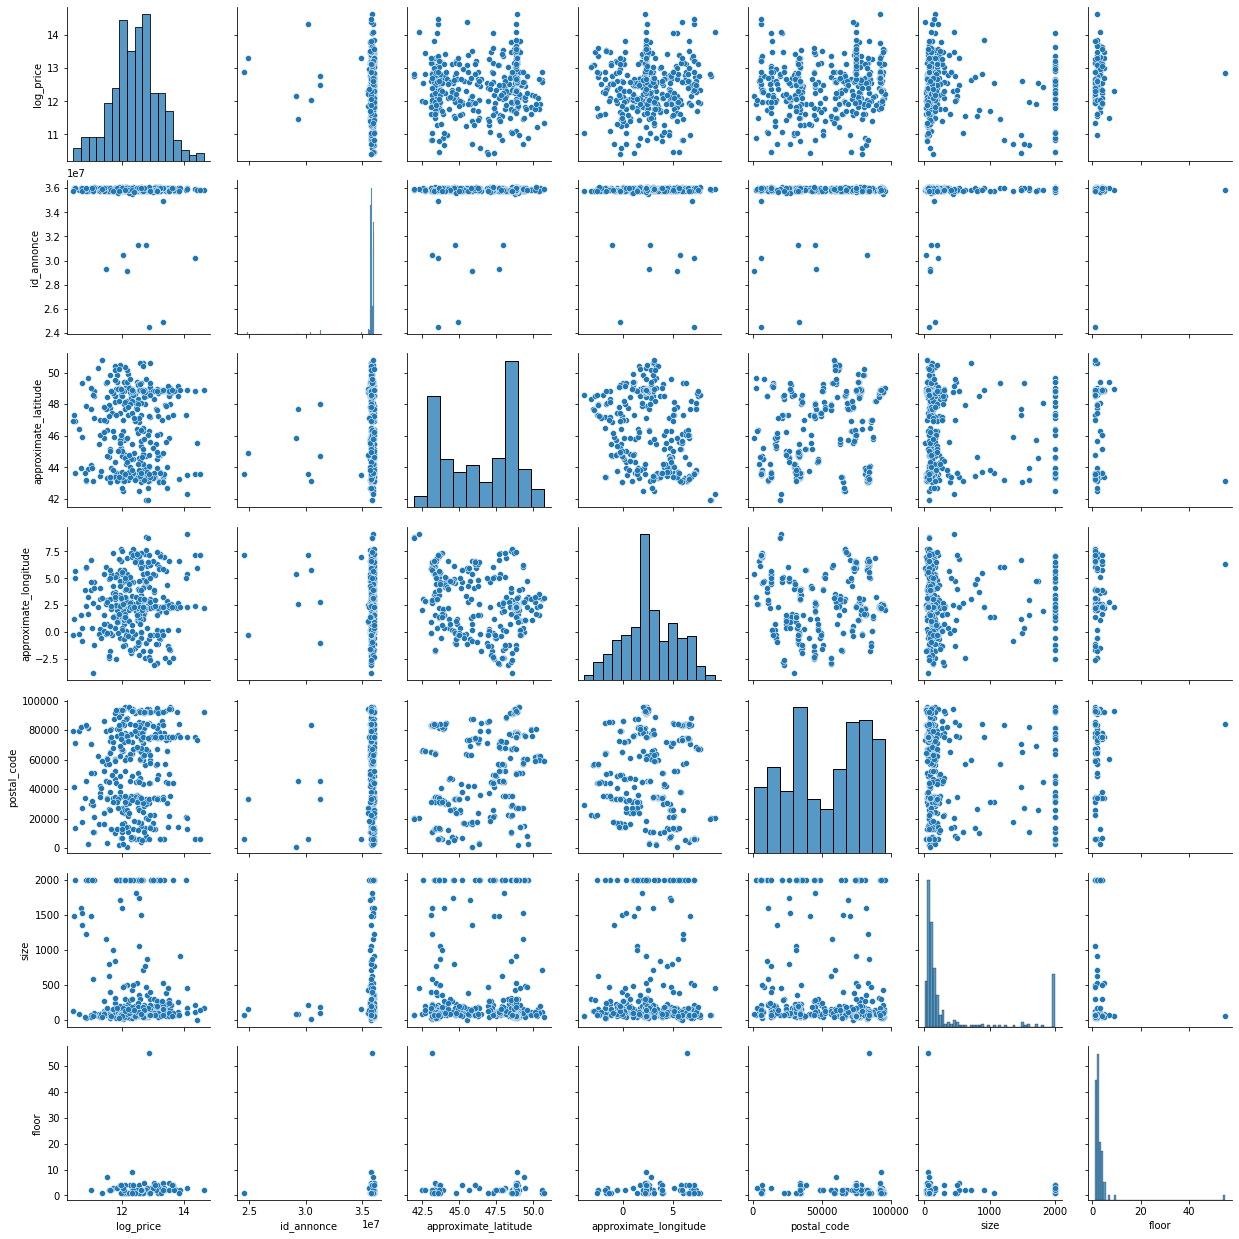

<Figure size 432x288 with 0 Axes>

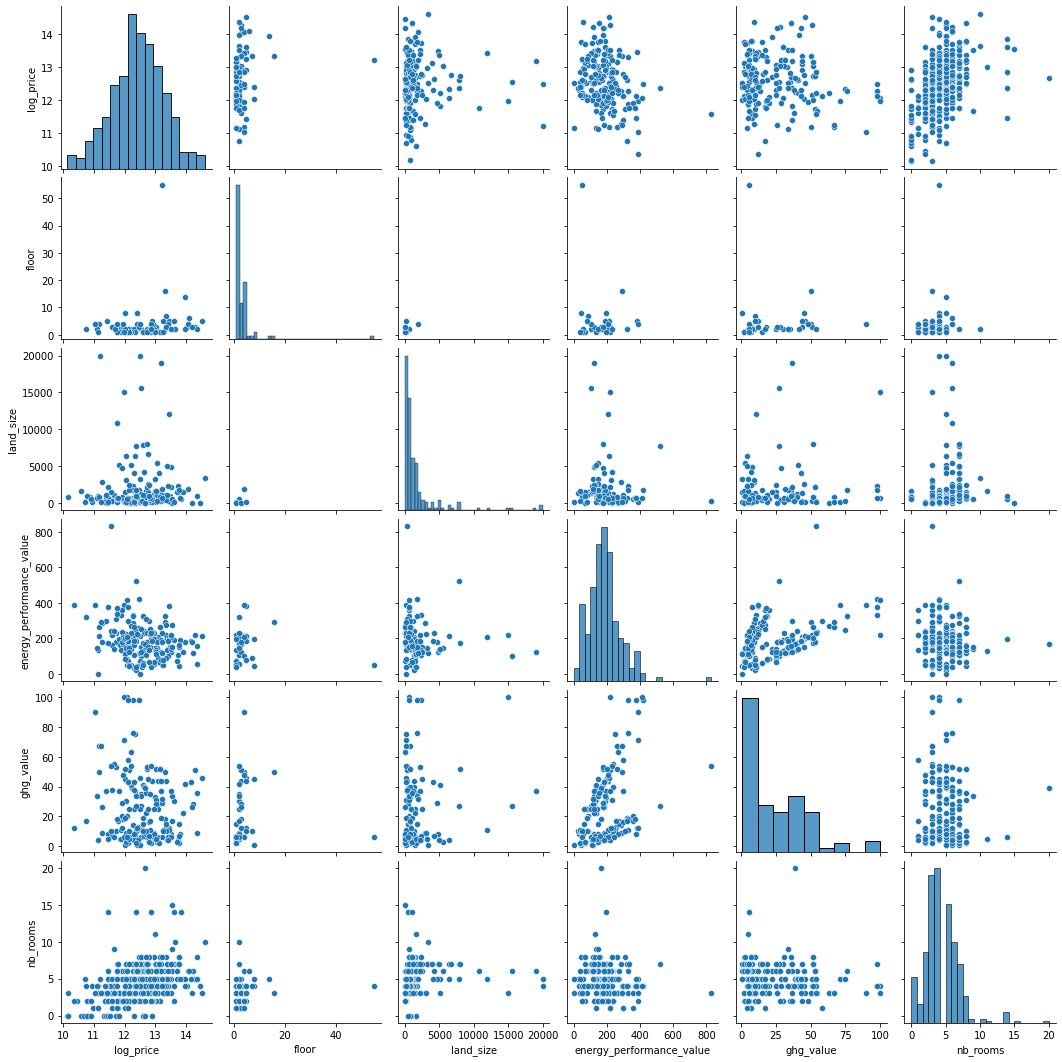

<Figure size 432x288 with 0 Axes>

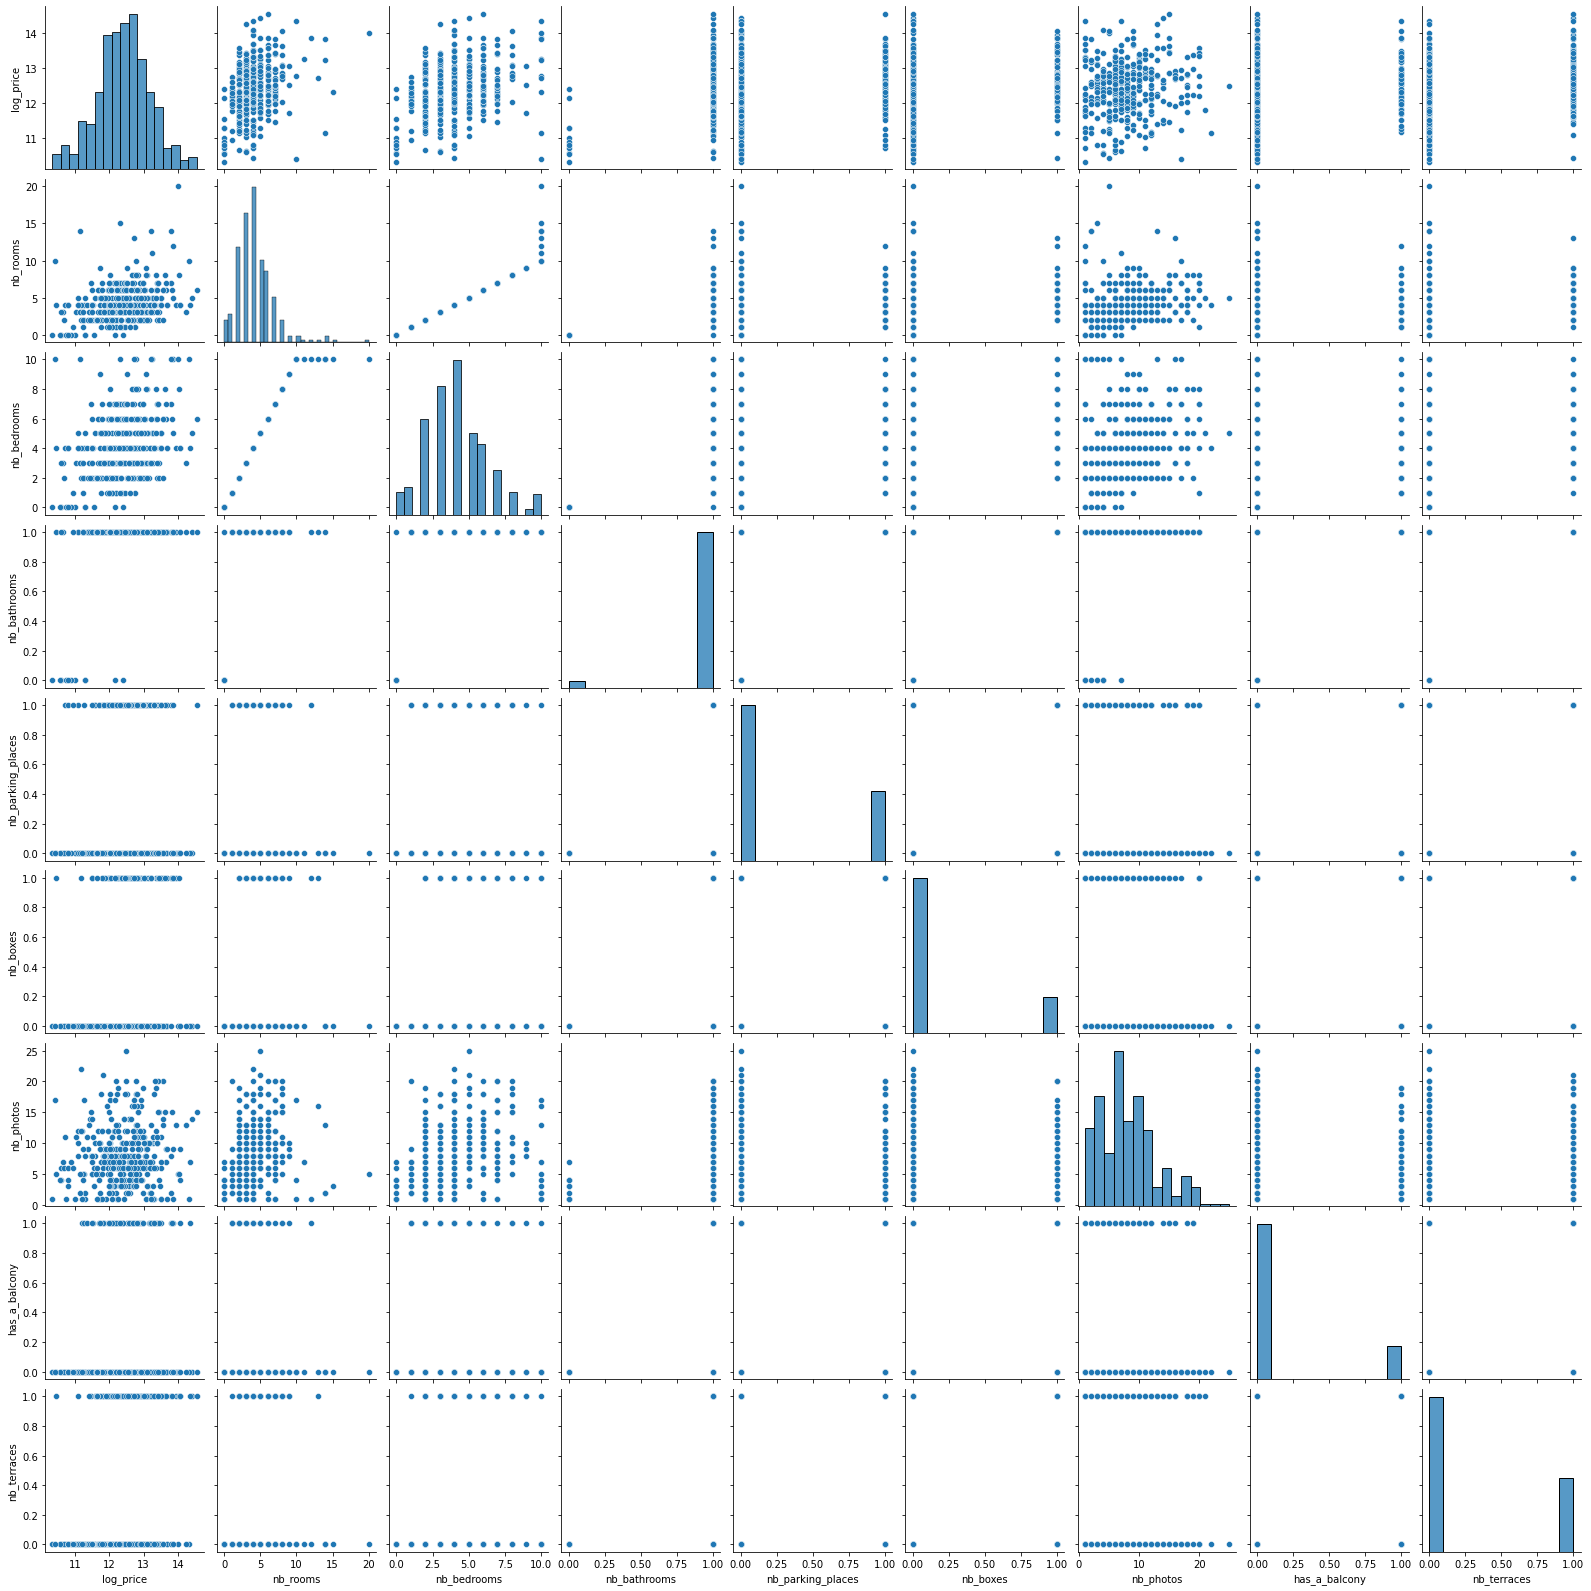

<Figure size 432x288 with 0 Axes>

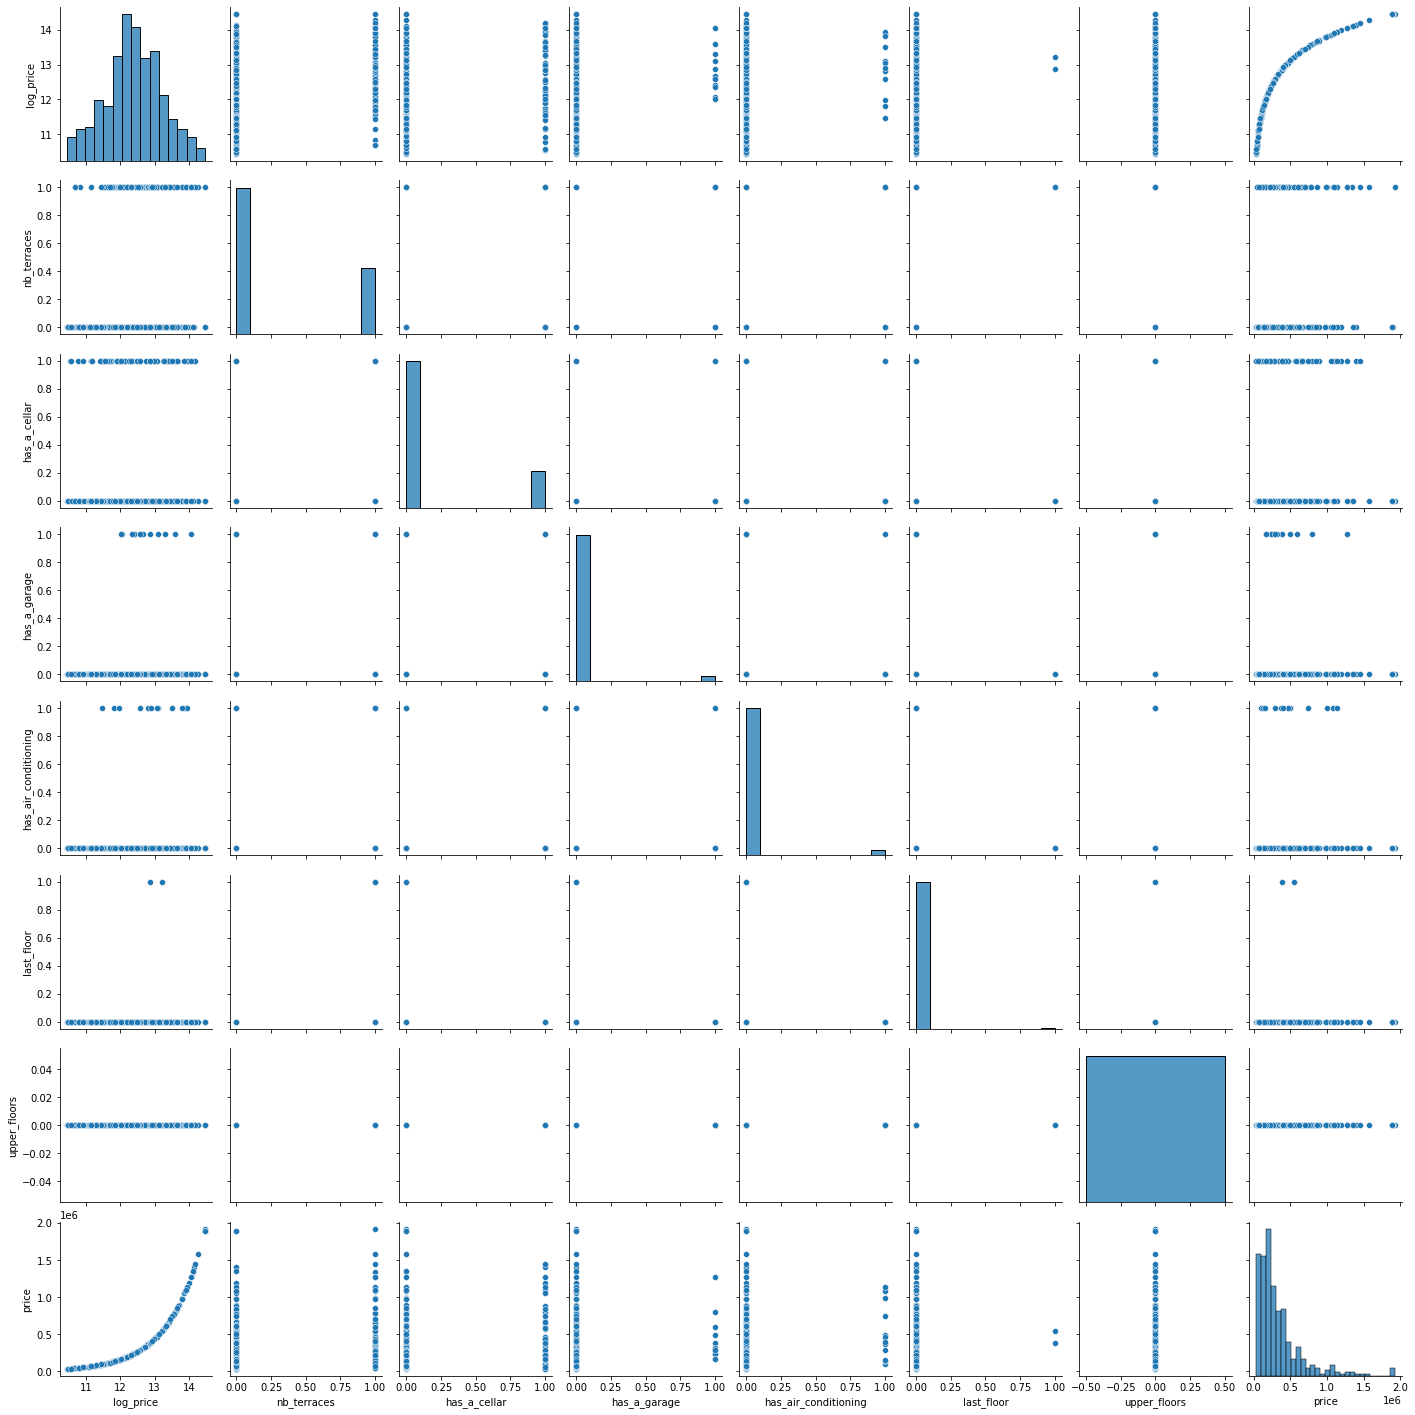

In [96]:
for i in range(4):
    columns_subset = ["log_price"] + [
        c
        for k, c in enumerate(data_all.columns)
        if i * 7 <= k <= (i + 1) * 7 and c != "log_price"
    ]
    data_subset = data_all[columns_subset].sample(data_all.shape[0] // 100)

    plt.figure()
    sns.pairplot(data_subset)
    plt.show()

# Types and memory

In [55]:
data_all.dtypes

id_annonce                       int64
property_type                   object
approximate_latitude           float64
approximate_longitude          float64
city                            object
postal_code                      int64
size                           float64
floor                          float64
land_size                      float64
energy_performance_value       float64
energy_performance_category     object
ghg_value                      float64
ghg_category                    object
exposition                      object
nb_rooms                       float64
nb_bedrooms                    float64
nb_bathrooms                   float64
nb_parking_places              float64
nb_boxes                       float64
nb_photos                      float64
has_a_balcony                  float64
nb_terraces                    float64
has_a_cellar                   float64
has_a_garage                   float64
has_air_conditioning           float64
last_floor               

In [56]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37368 entries, 0 to 37367
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_annonce                   37368 non-null  int64  
 1   property_type                37368 non-null  object 
 2   approximate_latitude         37368 non-null  float64
 3   approximate_longitude        37368 non-null  float64
 4   city                         37368 non-null  object 
 5   postal_code                  37368 non-null  int64  
 6   size                         36856 non-null  float64
 7   floor                        9743 non-null   float64
 8   land_size                    15581 non-null  float64
 9   energy_performance_value     19068 non-null  float64
 10  energy_performance_category  19068 non-null  object 
 11  ghg_value                    18530 non-null  float64
 12  ghg_category                 18530 non-null  object 
 13  exposition      

# Missing values analysis

In [57]:
import missingno

In [72]:
data_all.isnull().mean().sort_values(ascending=False).round(2).to_frame().T

,exposition,floor,land_size,ghg_category,ghg_value,energy_performance_value,energy_performance_category,nb_bathrooms,nb_bedrooms,nb_rooms,size,property_type,approximate_latitude,approximate_longitude,city,postal_code,log_price,price,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,id_annonce
0,0.76,0.74,0.58,0.5,0.5,0.49,0.49,0.36,0.07,0.04,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

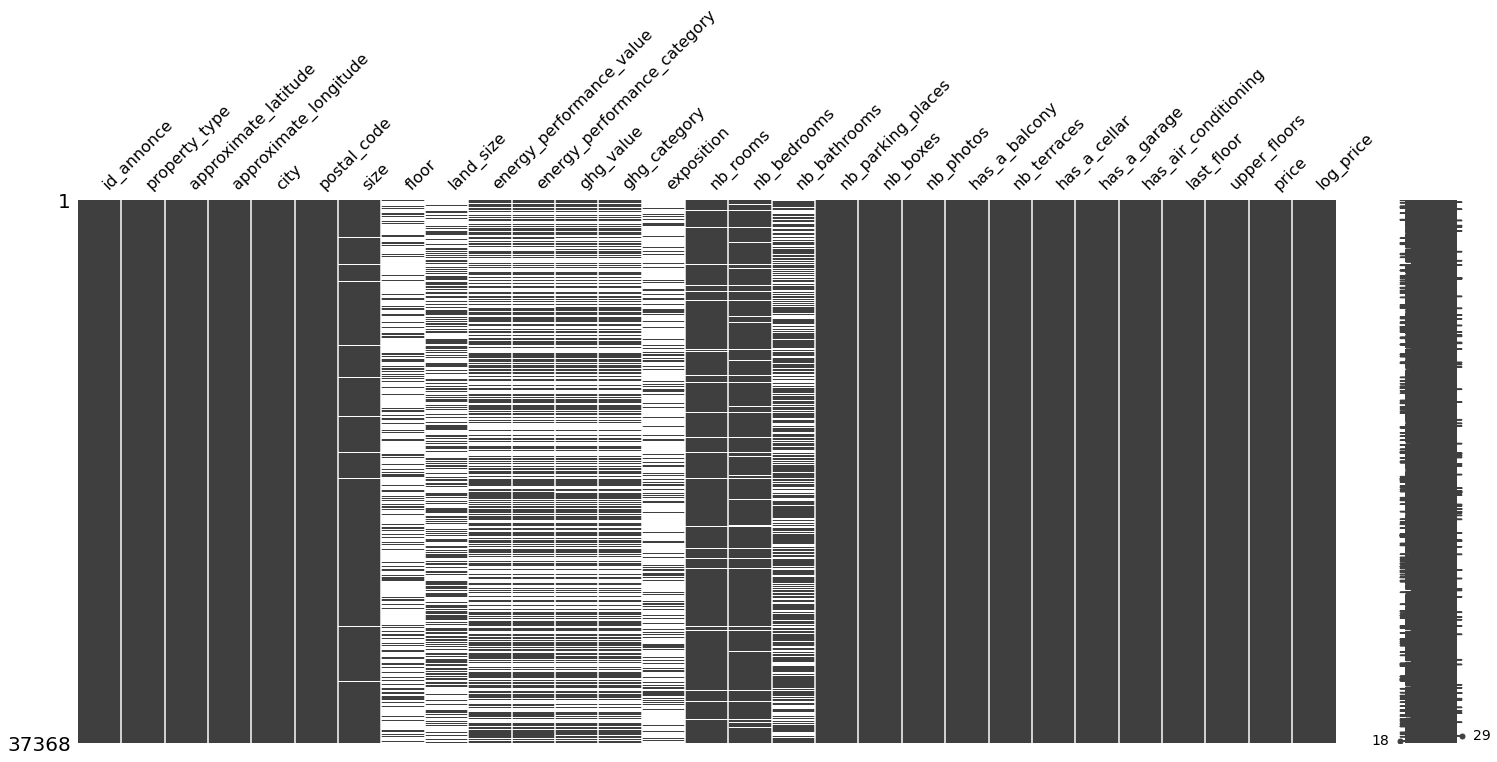

In [59]:
missingno.matrix(data_all)